In [ ]:
#Download Data from =>https://www.kaggle.com/datasets/adityajn105/flickr8k

In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.models import  Model ,load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.utils import to_categorical, plot_model
from keras.layers import Input , Dense , LSTM , Embedding , Dropout , add ,BatchNormalization
from PIL import Image
import matplotlib.pyplot as plt
import os
import tqdm
import numpy as np

In [3]:
#Defining Model
model=VGG16()
model=Model(inputs=model.inputs,outputs=model.layers[-2].output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
#Loading images
CRNT_DIR="D:\SureshKrishna\AI\CodSoft\ImageCaptioning"
dir=os.path.join(CRNT_DIR,"ImgData/")

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\sures\AppData\Local\Temp\ipykernel_24380\364416512.py:2: SyntaxWarning: invalid escape sequence '\S'
  CRNT_DIR="D:\SureshKrishna\AI\CodSoft\ImageCaptioning"


In [5]:
def ExtractImgData(dir):
    features={}

    for image_name in tqdm.tqdm(os.listdir(dir)):
         imgpath=dir + image_name
         img=load_img(imgpath,target_size=(224,224))
         img=img_to_array(img)

         img=img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
         img=preprocess_input(img)

         feature=model.predict(img,verbose=0)

         img_id = image_name.split('.')[0]
    
         features[img_id] = feature

    return features
    

In [6]:
ImageData=ExtractImgData(dir)

In [7]:
#Saving features
import pickle
pickle.dump(ImageData, open('Imagefeatures.pkl', 'wb'))

In [2]:
#Caption data
with open('captions/captions.txt','r') as txt:
    next(txt)
    imgcaptions=txt.read()

In [3]:
txtMapping={}
for line in imgcaptions.split('\n'):
   
   tokens=line.split(',')

   imgId,caption=tokens[0],tokens[1:]
   imgId=imgId.split('.')[0]
   caption="".join(caption)
   
   if imgId not in txtMapping:
        txtMapping[imgId] = []
   txtMapping[imgId].append(caption) 

In [4]:
txtMapping

{'1000268201_693b08cb0e': ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A girl going into a wooden building .',
  'A little girl climbing into a wooden playhouse .',
  'A little girl climbing the stairs to her playhouse .',
  'A little girl in a pink dress going into a wooden cabin .'],
 '1001773457_577c3a7d70': ['A black dog and a spotted dog are fighting',
  'A black dog and a tri-colored dog playing with each other on the road .',
  'A black dog and a white dog with brown spots are staring at each other in the street .',
  'Two dogs of different breeds looking at each other on the road .',
  'Two dogs on pavement moving toward each other .'],
 '1002674143_1b742ab4b8': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
  'There is a gi

In [5]:
def clean_captions(mapping):
    for key,captions in mapping.items():
        for i in range(len(captions)):
            caption=captions[i]

            caption=caption.lower()
            caption=caption.replace('[^A-Za-z]','')
            caption=caption.replace('\s+',' ')
            caption= 'startseq '+" ".join([word for word in caption.split() if len(word)>1])+' endseq'
            captions[i]=caption

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sures\AppData\Local\Temp\ipykernel_5152\3199010180.py:8: SyntaxWarning: invalid escape sequence '\s'
  caption=caption.replace('\s+',' ')


In [12]:
txtMapping['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [6]:
clean_captions(txtMapping)

In [7]:
txtMapping['1000268201_693b08cb0e']

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [8]:
captions=[]
for key in txtMapping:
    for caption in txtMapping[key]:
        
        captions.append(caption)

In [16]:
captions[:5]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [9]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(captions)
vacob=len(tokenizer.word_index)+1

In [10]:
maxlen=max(len(caption.split()) for caption in captions)
maxlen

35

In [11]:
image_ids = list(txtMapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [20]:
def DataGenrator(data,mapping,imgFeatures,tokenizer,maxlen,vacob,batchsize):
    x1,x2,y=list(),list(),list()
    n=0
    while 1:
        for keys in data:
            n+=1
            captions=mapping[keys]
        
            for caption in captions:

                seq=tokenizer.texts_to_sequences([caption])[0]
                for i in range(1,len(seq)):
                    inseq,outseq=seq[:i],seq[i]

                    inseq=pad_sequences([inseq],maxlen=maxlen)[0]
                    outseq = to_categorical([outseq],num_classes=vacob)[0]

                    x1.append(imgFeatures[keys][0])
                    x2.append(inseq)
                    y.append(outseq)
    
            if n == batchsize:
                x1,x2,y=np.array(x1),np.array(x2),np.array(y)
                yield (x1,x2),y
                x1,x2,y=list(),list(),list()
                n=0



In [21]:
#Model Creation
#Img Feature Layer
input1=Input(shape=(4096,))
feature1=Dropout(0.4)(input1)
feature2=Dense(256,activation='relu')(feature1)
#Seq Feature Layer
input2=Input(shape=(maxlen,))
seq1=Embedding(vacob,256,mask_zero=True)(input2)
seq2=Dropout(0.4)(seq1)
seq3=LSTM(256)(seq2)

#Decoder
decoder1=add([feature2,seq3])
decoder2=Dense(256,activation='relu')(decoder1)
outputs=Dense(vacob,activation='softmax')(decoder2)

model=Model(inputs=[input1,input2],outputs=outputs)
model.compile(loss='categorical_crossentropy',optimizer='adam')

# plot_model(model,show_shapes=True)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 35)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 4096)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 35, 256)   │  2,172,160 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 4096)      │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 35, 256)   │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 35)        │          0 │ input_layer_2[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  1,048,832 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 256)       │    525,312 │ dropout_1[0][0],  │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256)       │          0 │ dense[0][0],      │
│                     │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │     65,792 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 8485)      │  2,180,645 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,992,741 (22.86 MB)

 Trainable params: 5,992,741 (22.86 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#Loading Image Features
import pickle
imgFeatures=pickle.load(open('Imagefeatures.pkl','rb'))

In [23]:
imgFeatures

{'1000268201_693b08cb0e': array([[2.5074735, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]], dtype=float32),
 '1001773457_577c3a7d70': array([[0.        , 0.        , 0.49414796, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 '1002674143_1b742ab4b8': array([[1.4937917 , 0.        , 0.53567606, ..., 2.3152387 , 3.7418265 ,
         0.        ]], dtype=float32),
 '1003163366_44323f5815': array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 '1007129816_e794419615': array([[0.        , 0.09227586, 0.        , ..., 0.        , 0.        ,
         0.06529188]], dtype=float32),
 '1007320043_627395c3d8': array([[0.      , 0.      , 0.      , ..., 0.      , 3.339017, 0.      ]],
       dtype=float32),
 '1009434119_febe49276a': array([[2.096517  , 2.1192539 , 3.561987  , ..., 0.64242893, 2.7142    ,
         0.        ]], dtype=float32),
 '1012212859_01547e3f17': array([[0.        , 0.        , 0.9873718 , ..., 0.        , 1.4932494 ,
         0.8

In [26]:

epochs=15
batchsize=64
steps=len(train)//batchsize

for i in range(epochs):
    Traingenerator=DataGenrator(train,txtMapping,imgFeatures,tokenizer,maxlen,vacob,batchsize)
    
    print("Epochs ",i," out of ",epochs) 
    history=model.fit(Traingenerator,epochs=1,steps_per_epoch=steps,verbose=1)    

Epochs  0  out of  15
113/113 ━━━━━━━━━━━━━━━━━━━━ 355s 3s/step - loss: 5.0057
Epochs  1  out of  15
113/113 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - loss: 4.0792
Epochs  2  out of  15
113/113 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - loss: 3.6608
Epochs  3  out of  15
113/113 ━━━━━━━━━━━━━━━━━━━━ 396s 3s/step - loss: 3.4086
Epochs  4  out of  15
113/113 ━━━━━━━━━━━━━━━━━━━━ 285s 3s/step - loss: 3.2199
Epochs  5  out of  15
113/113 ━━━━━━━━━━━━━━━━━━━━ 449s 4s/step - loss: 3.0754
Epochs  6  out of  15
113/113 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - loss: 2.9605
Epochs  7  out of  15
113/113 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - loss: 2.8580
Epochs  8  out of  15
113/113 ━━━━━━━━━━━━━━━━━━━━ 1102s 10s/step - loss: 2.7775
Epochs  9  out of  15
113/113 ━━━━━━━━━━━━━━━━━━━━ 333s 3s/step - loss: 2.7089
Epochs  10  out of  15
113/113 ━━━━━━━━━━━━━━━━━━━━ 377s 3s/step - loss: 2.6417
Epochs  11  out of  15
113/113 ━━━━━━━━━━━━━━━━━━━━ 292s 3s/step - loss: 2.5812
Epochs  12  out of  15
113/113 ━━━━━━━━━━━━━━━━━

In [28]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 35)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 4096)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 35, 256)   │  2,172,160 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 4096)      │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 35, 256)   │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 35)        │          0 │ input_layer_2[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  1,048,832 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 256)       │    525,312 │ dropout_1[0][0],  │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256)       │          0 │ dense[0][0],      │
│                     │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │     65,792 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 8485)      │  2,180,645 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17,978,225 (68.58 MB)

 Trainable params: 5,992,741 (22.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,985,484 (45.72 MB)

In [30]:
# model.save('./Models/Model.h5')
model.save('./Models/my_model.keras')

In [33]:
model_json = model.to_json()
with open("./Models/model.json", "w") as json_file:
    json_file.write(model_json)

In [13]:
model=load_model('./Models/my_model.keras')

In [14]:
def idx_to_word(integer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [15]:
def GenarateCaptions(image,maxlen):
    inputtxt='startseq'
    pred=[]
    for i in range(maxlen):

        inputSeq=tokenizer.texts_to_sequences([inputtxt])[0]
        inputSeq=pad_sequences([inputSeq],maxlen=maxlen)

        
        predCaption=model.predict([image,inputSeq],verbose=0)

        predCaption=np.argmax(predCaption)

        word=idx_to_word(predCaption)

        if word is None:
            break

        inputtxt+=' '+word

        if word == 'endseq':
            break
          
    return inputtxt

In [16]:
#Defining Model
inputmodel=VGG16()
inputmodel=Model(inputs=inputmodel.inputs,outputs=inputmodel.layers[-2].output)
    
def ExtractInputImg(imgpath):
    feature=[]

    inImg=load_img(imgpath,target_size=(224,224))
    inImg=img_to_array(inImg)
    inImg=inImg.reshape((1, inImg.shape[0], inImg.shape[1], inImg.shape[2]))
    inImg=preprocess_input(inImg)

    feature.append(inputmodel.predict(inImg,verbose=0))

    return feature
    

In [ ]:
def CleanResult(caption):
      
    caption=[word for word in caption.split() if word.lower() not in ['startseq','endseq']]
    caption=' '.join(caption)
    
    c=[]
    for w in caption.split():
        if w not in c:
            c.append(w)
    caption=" ".join(c)
    return caption

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

for key in tqdm.tqdm(test):
    #actual caption
    captions = txtMapping[key]
    #predict the caption for image
    y_pred=GenarateCaptions(imgFeatures[key],maxlen)
    # split into words
    actual_captions = [caption.split() for caption in captions]
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

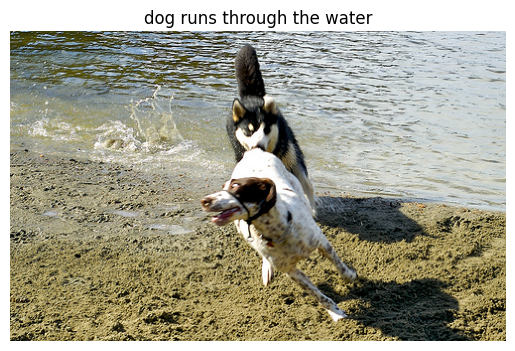

dog runs through the water


In [113]:
InputImg='./ImgData/'+test[80]+'.jpg'
inputFeature=ExtractInputImg(InputImg)
caption=GenarateCaptions(inputFeature,maxlen)
caption=CleanResult(caption)
image=Image.open(InputImg)
plt.imshow(image)
plt.title(caption)
plt.axis(False)
plt.show()
print(caption)

@SureshKrishnan